In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
sns.set(rc={'figure.figsize':(10,6)})

In [2]:
train=pd.read_csv('train.csv',sep=';')
test=pd.read_csv('test.csv',sep=';')
bank=pd.concat([train,test],ignore_index=True)

In [3]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bank.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49722,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes
49723,40,blue-collar,married,secondary,no,1100,yes,no,unknown,29,may,660,2,-1,0,unknown,no
49724,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
49725,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,153,1,failure,no
49726,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
49731,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
bank.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9827,59,retired,married,secondary,no,1173,no,no,unknown,9,jun,77,2,-1,0,unknown,no
40363,83,retired,married,primary,no,425,no,no,telephone,22,jun,883,1,140,1,failure,yes
7718,44,blue-collar,single,primary,no,787,yes,no,unknown,30,may,570,2,-1,0,unknown,no
22747,37,unemployed,divorced,tertiary,no,1085,no,no,cellular,25,aug,146,4,-1,0,unknown,no
45706,48,management,divorced,tertiary,no,1328,yes,no,unknown,6,may,339,1,-1,0,unknown,no
35744,38,admin.,divorced,secondary,no,859,yes,yes,cellular,8,may,52,1,302,4,failure,no
11692,48,self-employed,divorced,secondary,yes,7,no,no,unknown,20,jun,633,2,-1,0,unknown,no
30488,64,management,married,tertiary,no,6251,no,no,telephone,5,feb,125,7,-1,0,unknown,no
35013,39,technician,divorced,secondary,no,530,yes,yes,cellular,6,may,68,1,-1,0,unknown,no
8977,35,blue-collar,married,secondary,no,344,no,no,unknown,5,jun,25,1,-1,0,unknown,no


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [7]:
category = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','day','month','poutcome', 'y']
bank[category] = bank[category].astype('category')

In [8]:
numeric = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        49732 non-null  int64   
 1   job        49732 non-null  category
 2   marital    49732 non-null  category
 3   education  49732 non-null  category
 4   default    49732 non-null  category
 5   balance    49732 non-null  int64   
 6   housing    49732 non-null  category
 7   loan       49732 non-null  category
 8   contact    49732 non-null  category
 9   day        49732 non-null  category
 10  month      49732 non-null  category
 11  duration   49732 non-null  int64   
 12  campaign   49732 non-null  int64   
 13  pdays      49732 non-null  int64   
 14  previous   49732 non-null  int64   
 15  poutcome   49732 non-null  category
 16  y          49732 non-null  category
dtypes: category(11), int64(6)
memory usage: 2.8 MB


In [10]:
bank.describe()

,age,balance,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
bank.describe(include = 'category')

,job,marital,education,default,housing,loan,contact,day,month,poutcome,y
count,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732
unique,12,3,4,2,2,2,3,31,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,20,may,unknown,no
freq,10678,30011,25508,48841,27689,41797,32181,3009,15164,40664,43922


In [12]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

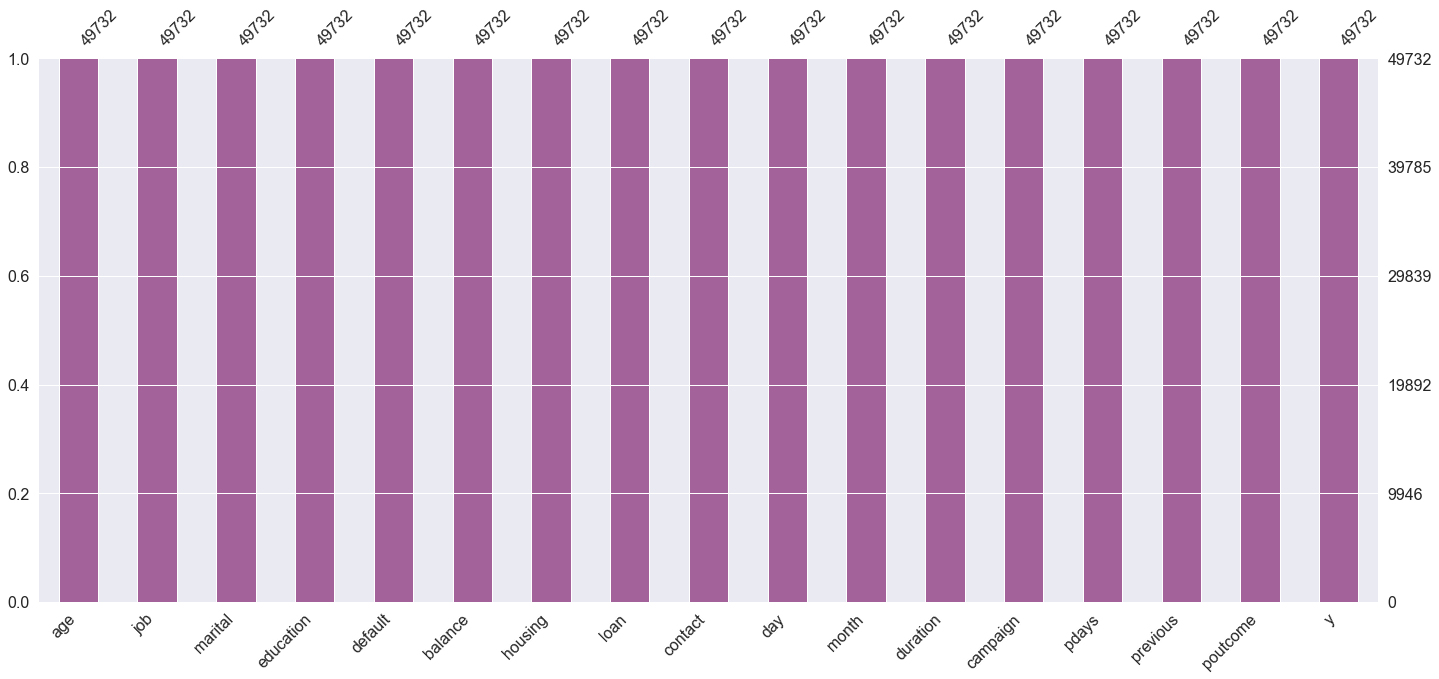

In [13]:
msno.bar(bank, color='#a3629a')

In [14]:
bank[numeric].nunique()

age           77
balance     7168
duration    1573
campaign      48
pdays        559
previous      41
dtype: int64

In [15]:
bank[category].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
day          31
month        12
poutcome      4
y             2
dtype: int64

## Distribution of numeric

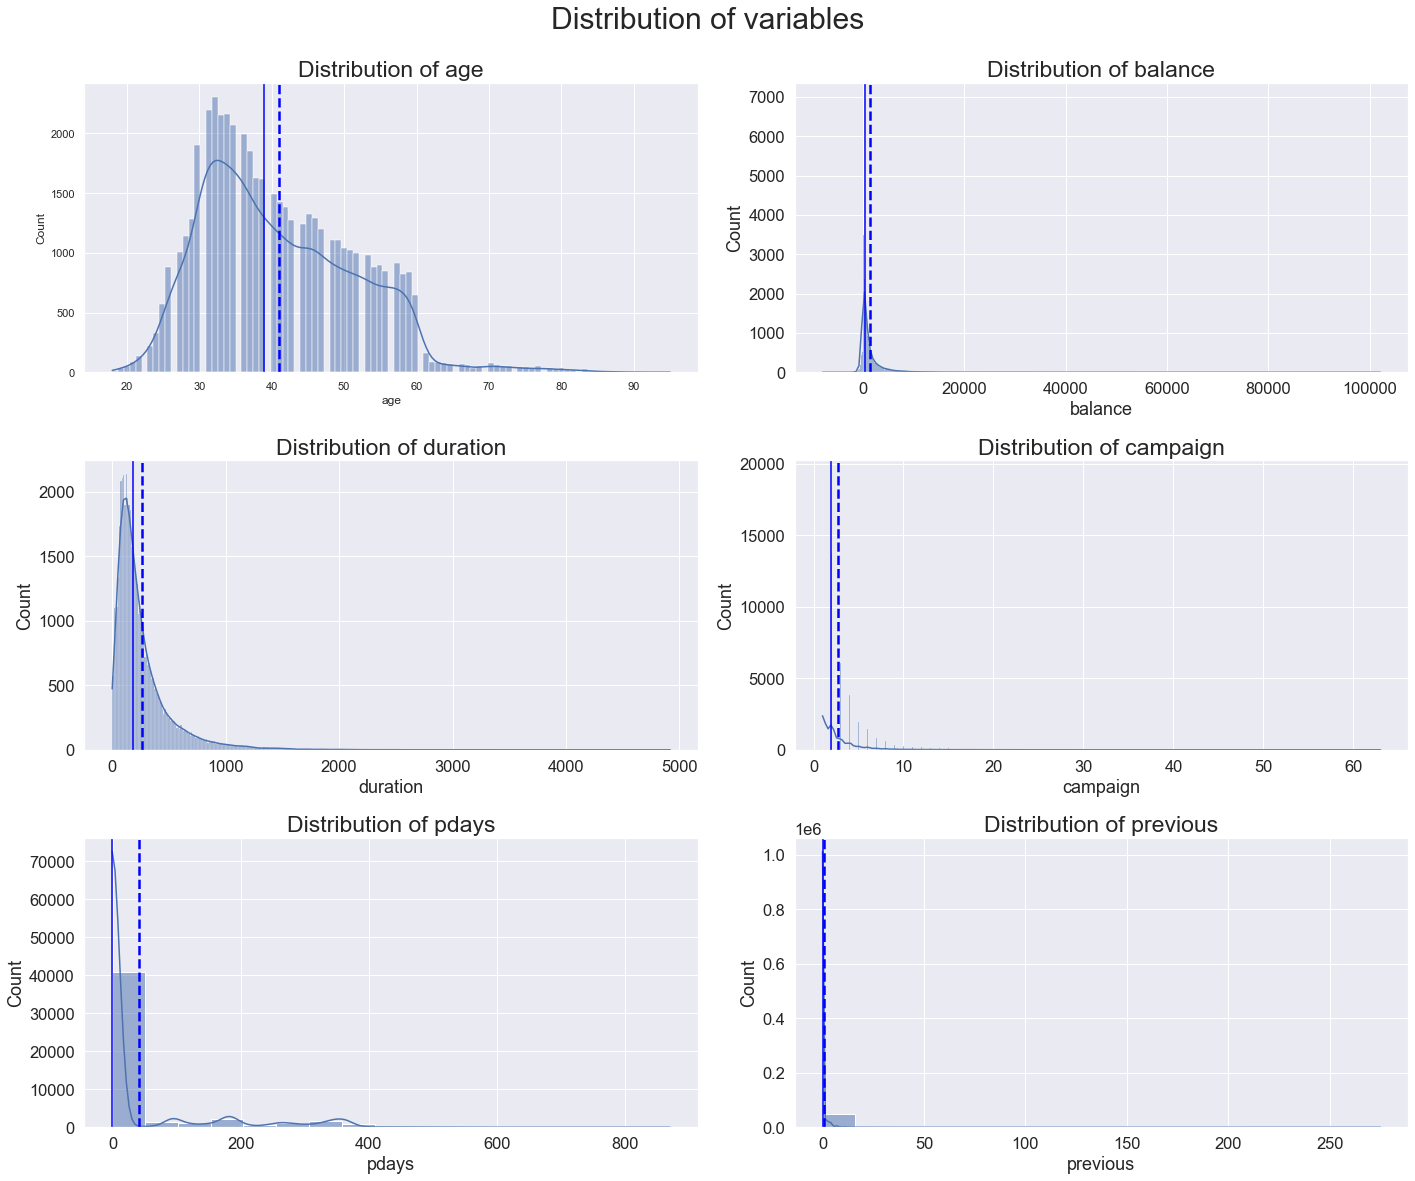

In [16]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.histplot(bank[i],kde=True, palette='Set3')    
    ax.set_title('Distribution of %s'%(i), fontsize=23)
    plt.axvline(x=bank[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=bank[i].median(), color='blue',label='medain')
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)
plt.show()


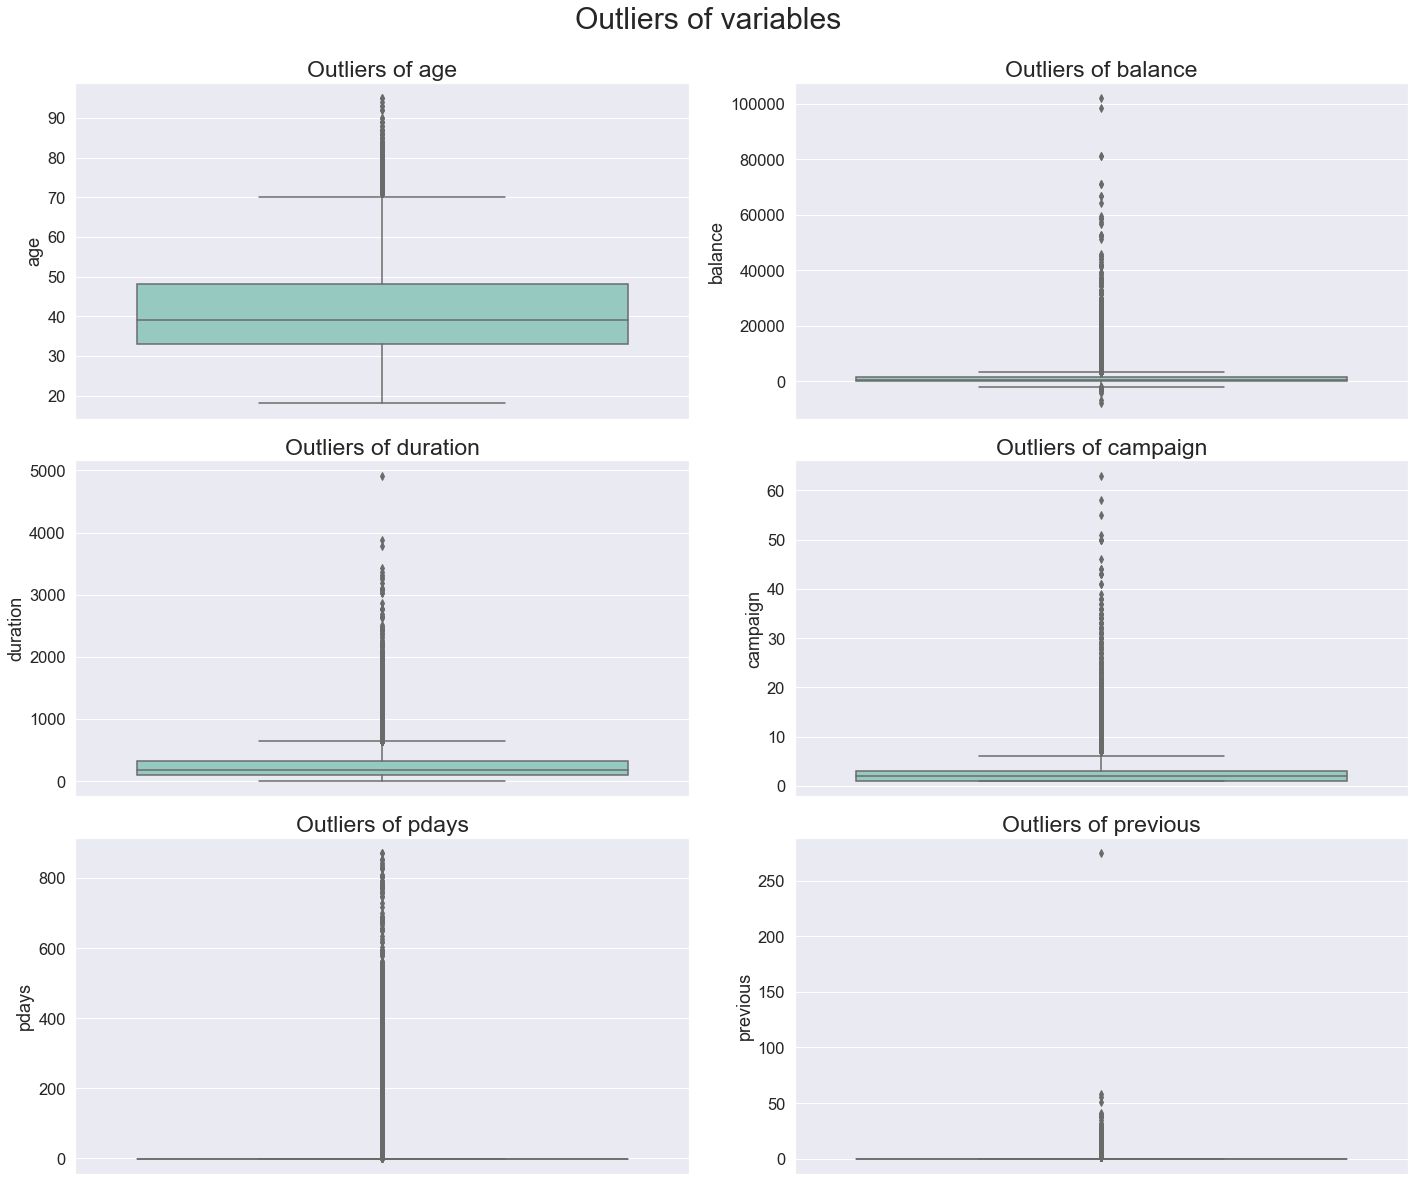

In [17]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.boxplot(y=bank[i], palette='Set3')    
    ax.set_title('Outliers of %s'%(i), fontsize=23)
    n+=1 
    plt.tight_layout()
plt.suptitle('Outliers of variables', y=1.03, fontsize=30)
plt.show()


In [18]:
bank[numeric].skew()

age          0.686033
balance      8.204429
duration     3.109530
campaign     4.884266
pdays        2.624838
previous    40.783648
dtype: float64

In [19]:
bank_log = bank.copy(deep=True)
for i in numeric:
    bank_log[i] = np.log(bank_log[i]+1)
bank_log[numeric].skew()

C:\Users\Rhytham\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Rhytham\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


age         0.114026
balance          NaN
duration   -0.455335
campaign    1.324308
pdays            NaN
previous    2.511950
dtype: float64

In [20]:
bank_sqrt = bank.copy(deep=True)
for i in numeric:
    bank_sqrt[i] = np.sqrt(bank_sqrt[i])
bank_sqrt[numeric].skew()

C:\Users\Rhytham\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


age         0.383441
balance     1.885586
duration    1.165189
campaign    2.201397
pdays      -0.284698
previous    2.850686
dtype: float64

In [21]:
bank_cbrt = bank.copy(deep=True)
for i in numeric:
    bank_cbrt[i] = np.cbrt(bank_cbrt[i])
bank_cbrt[numeric].skew()

age         0.287744
balance    -0.076314
duration    0.634772
campaign    1.649735
pdays       1.763555
previous    2.053087
dtype: float64

In [22]:
bank1 = bank_cbrt.copy(deep=True)

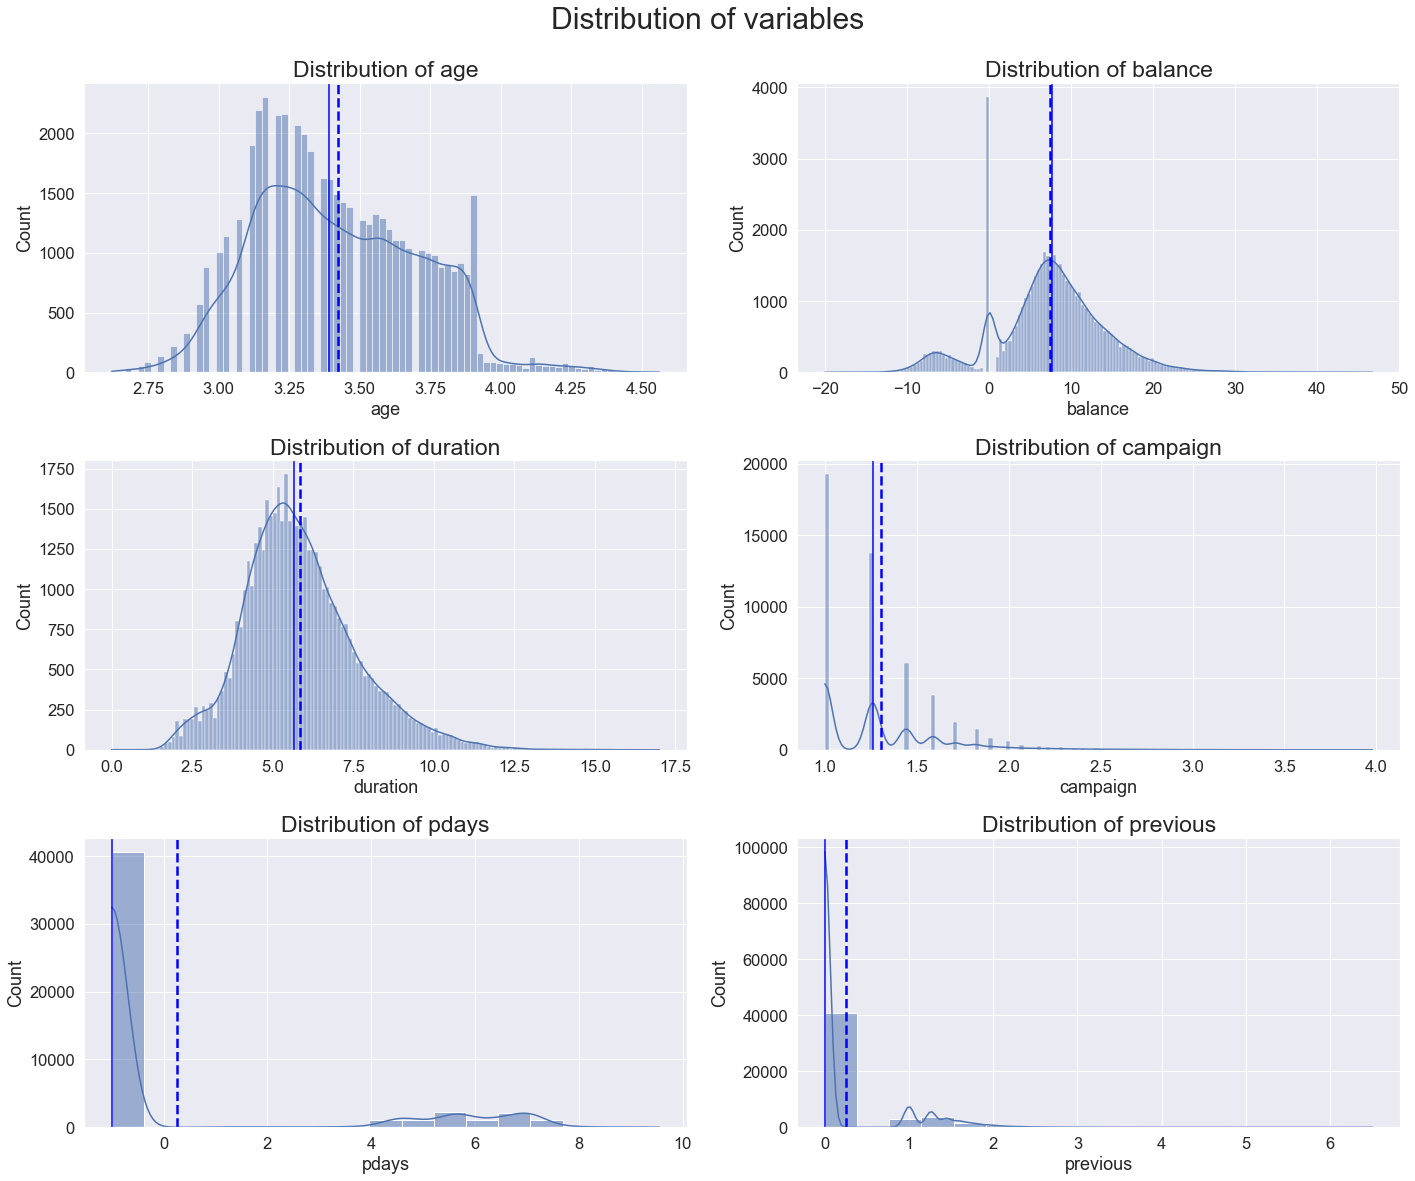

In [23]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.histplot(bank1[i],kde=True, palette='Set3')    
    ax.set_title('Distribution of %s'%(i), fontsize=23)
    plt.axvline(x=bank1[i].mean(),ls='--',lw=2.5, color='blue',label='mean')
    plt.axvline(x=bank1[i].median(), color='blue',label='medain')
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=30)
plt.show()


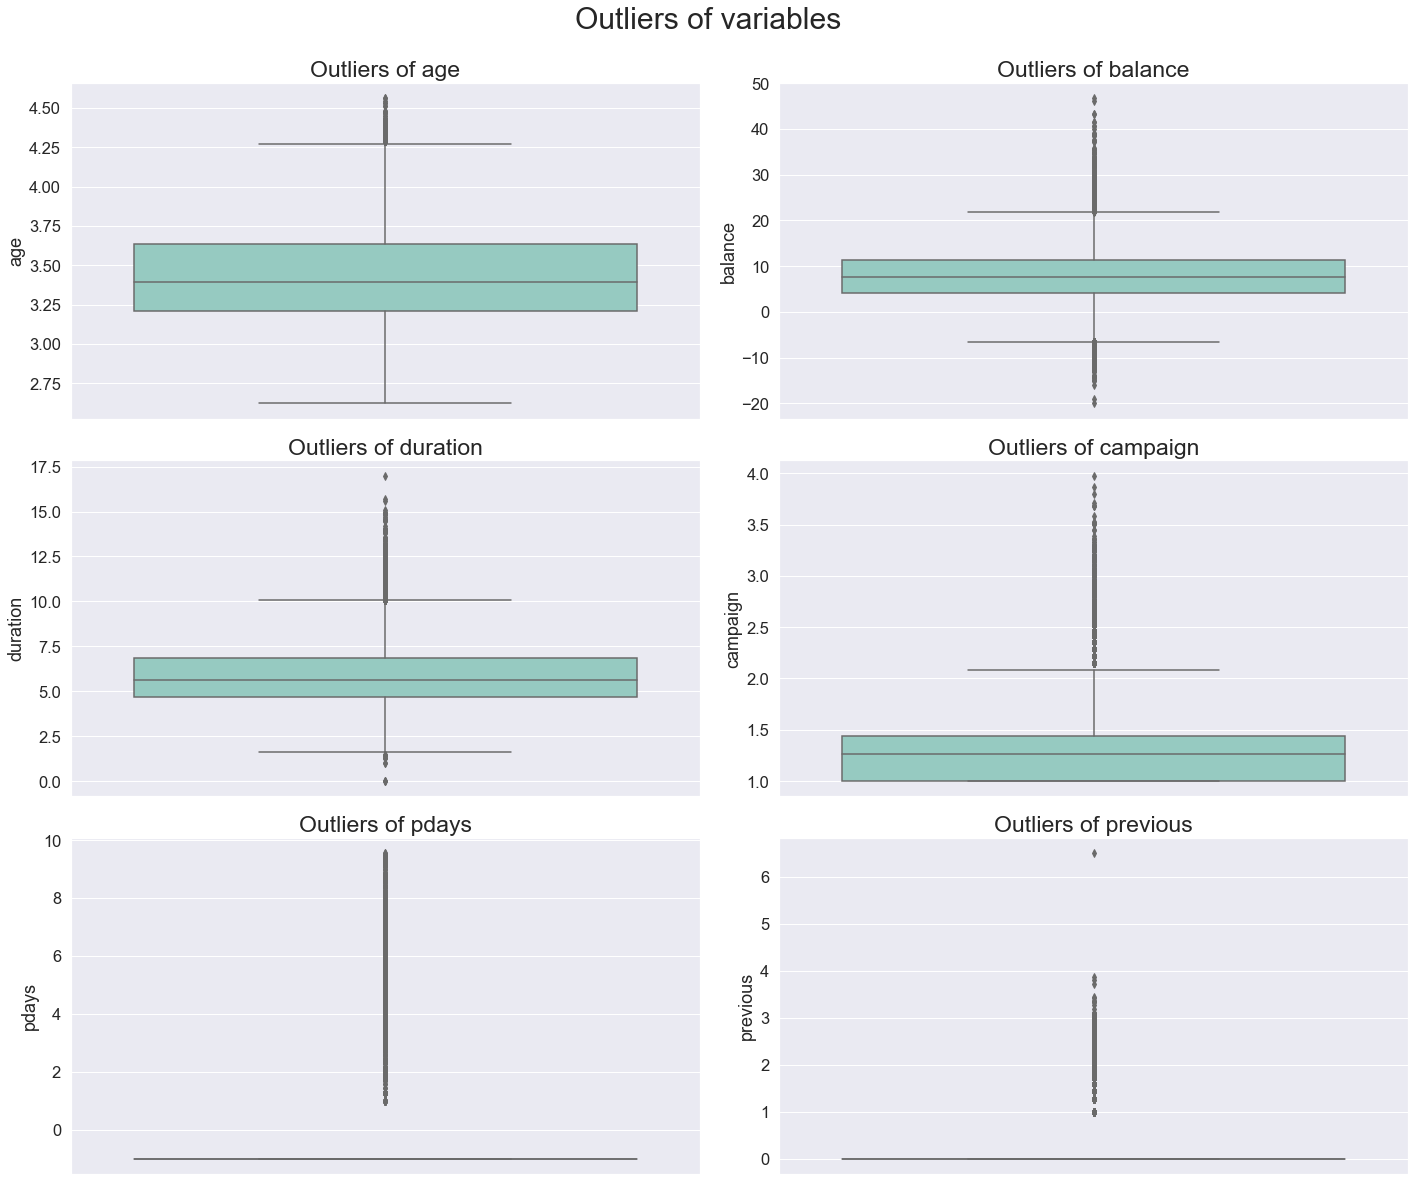

In [24]:
n=1
plt.subplots(figsize=(20, 16))
for i in numeric:
    plt.subplot(3,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.boxplot(y=bank1[i], palette='Set3')    
    ax.set_title('Outliers of %s'%(i), fontsize=23)
    n+=1 
    plt.tight_layout()
plt.suptitle('Outliers of variables', y=1.03, fontsize=30)
plt.show()


## Distribution of category

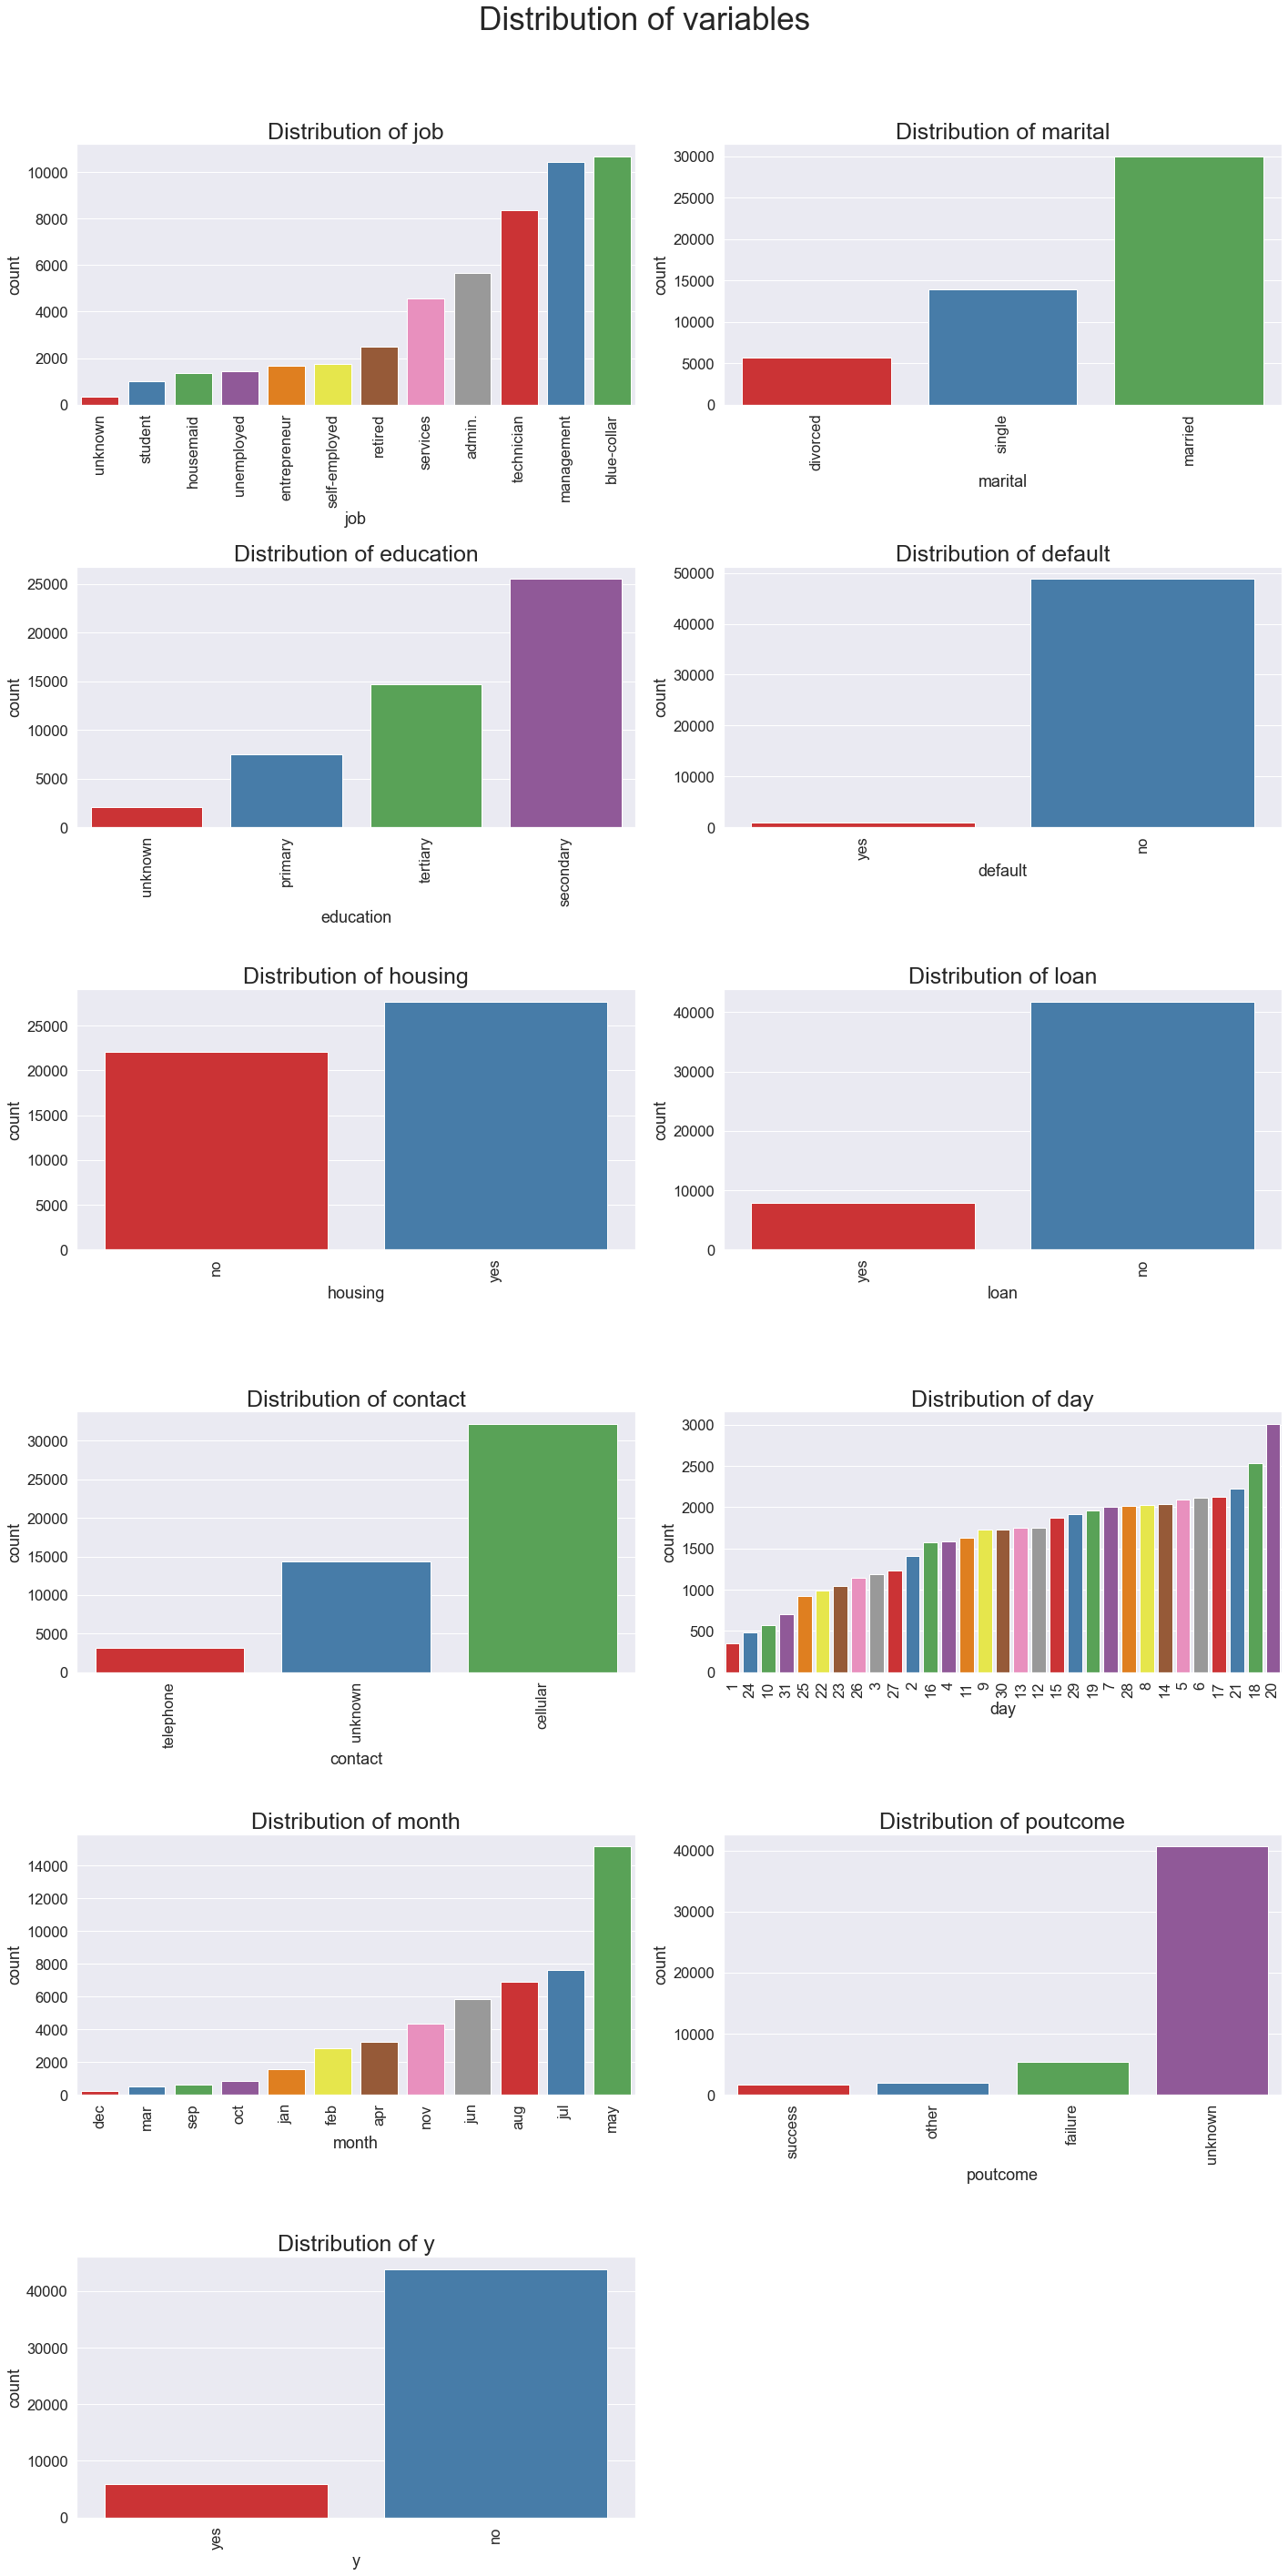

In [25]:
n=1
plt.subplots(figsize=(20, 50))
for i in category:
    plt.subplot(8,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.countplot(x = bank1[i], palette='Set1',order=bank[i].value_counts().sort_values().index)    
    ax.set_title('Distribution of %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    plt.tight_layout()
plt.suptitle('Distribution of variables', y=1.03, fontsize=35)
plt.show()


## Numerical vs categorical 

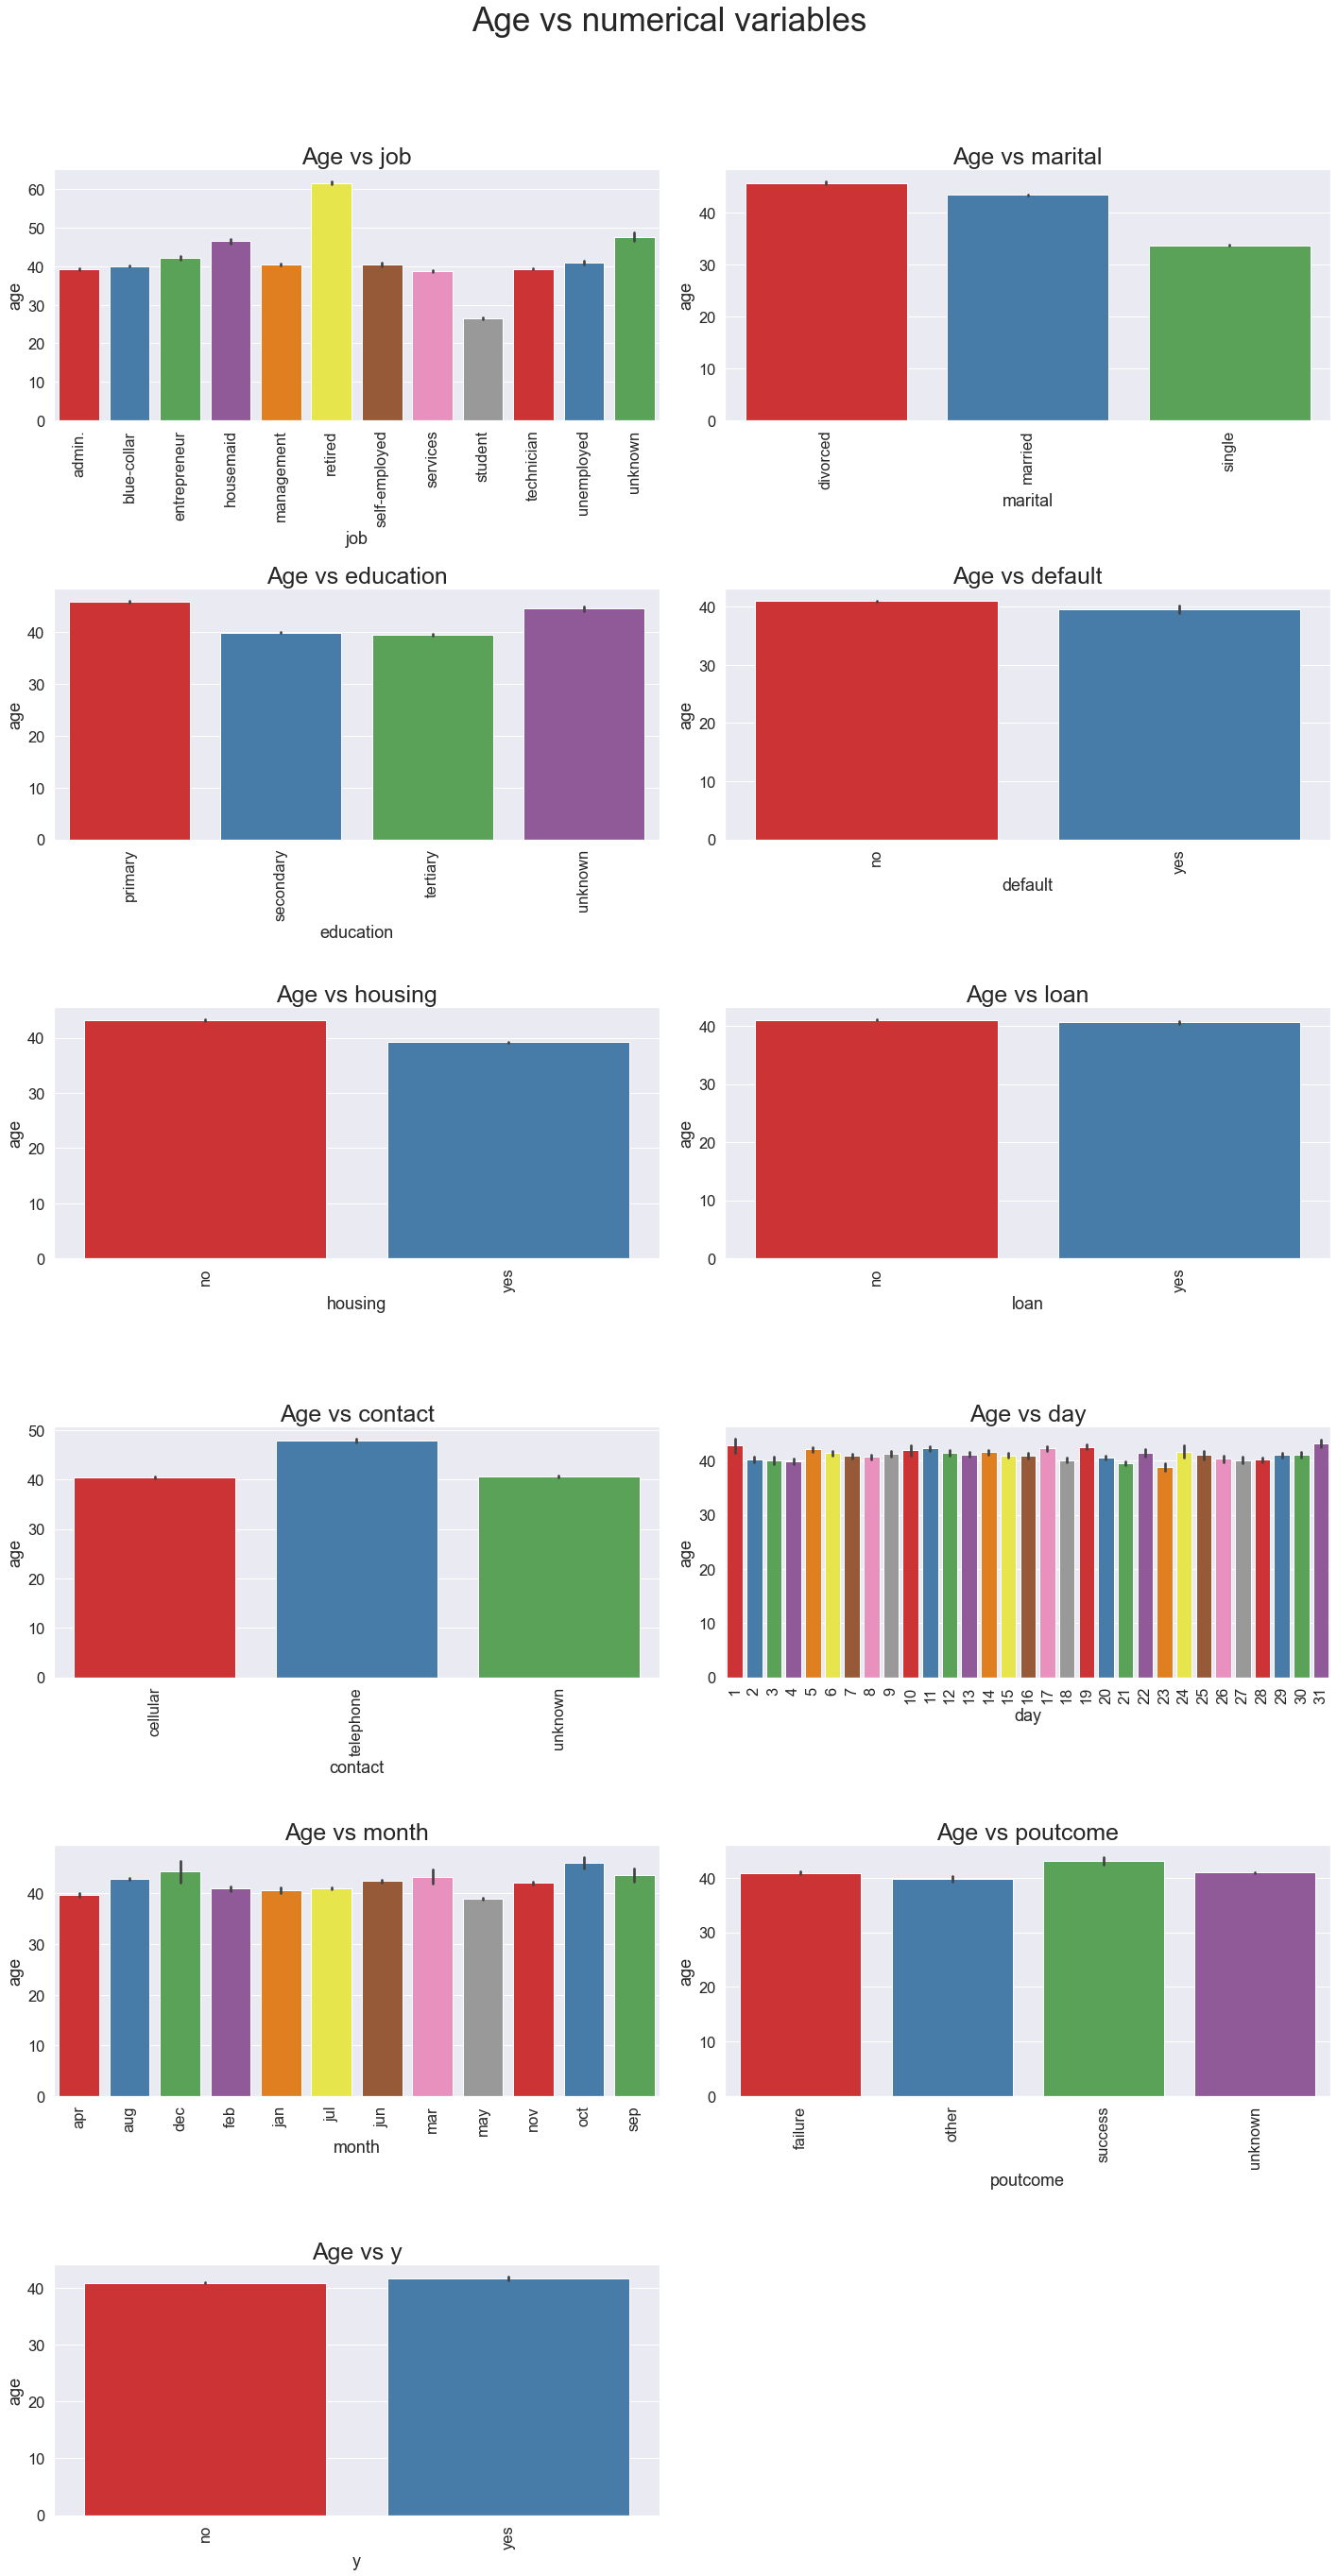

In [26]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank['age'], palette='Set1')    
    ax.set_title('Age vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('Age vs numerical variables', y=1.03, fontsize=35)
plt.show()


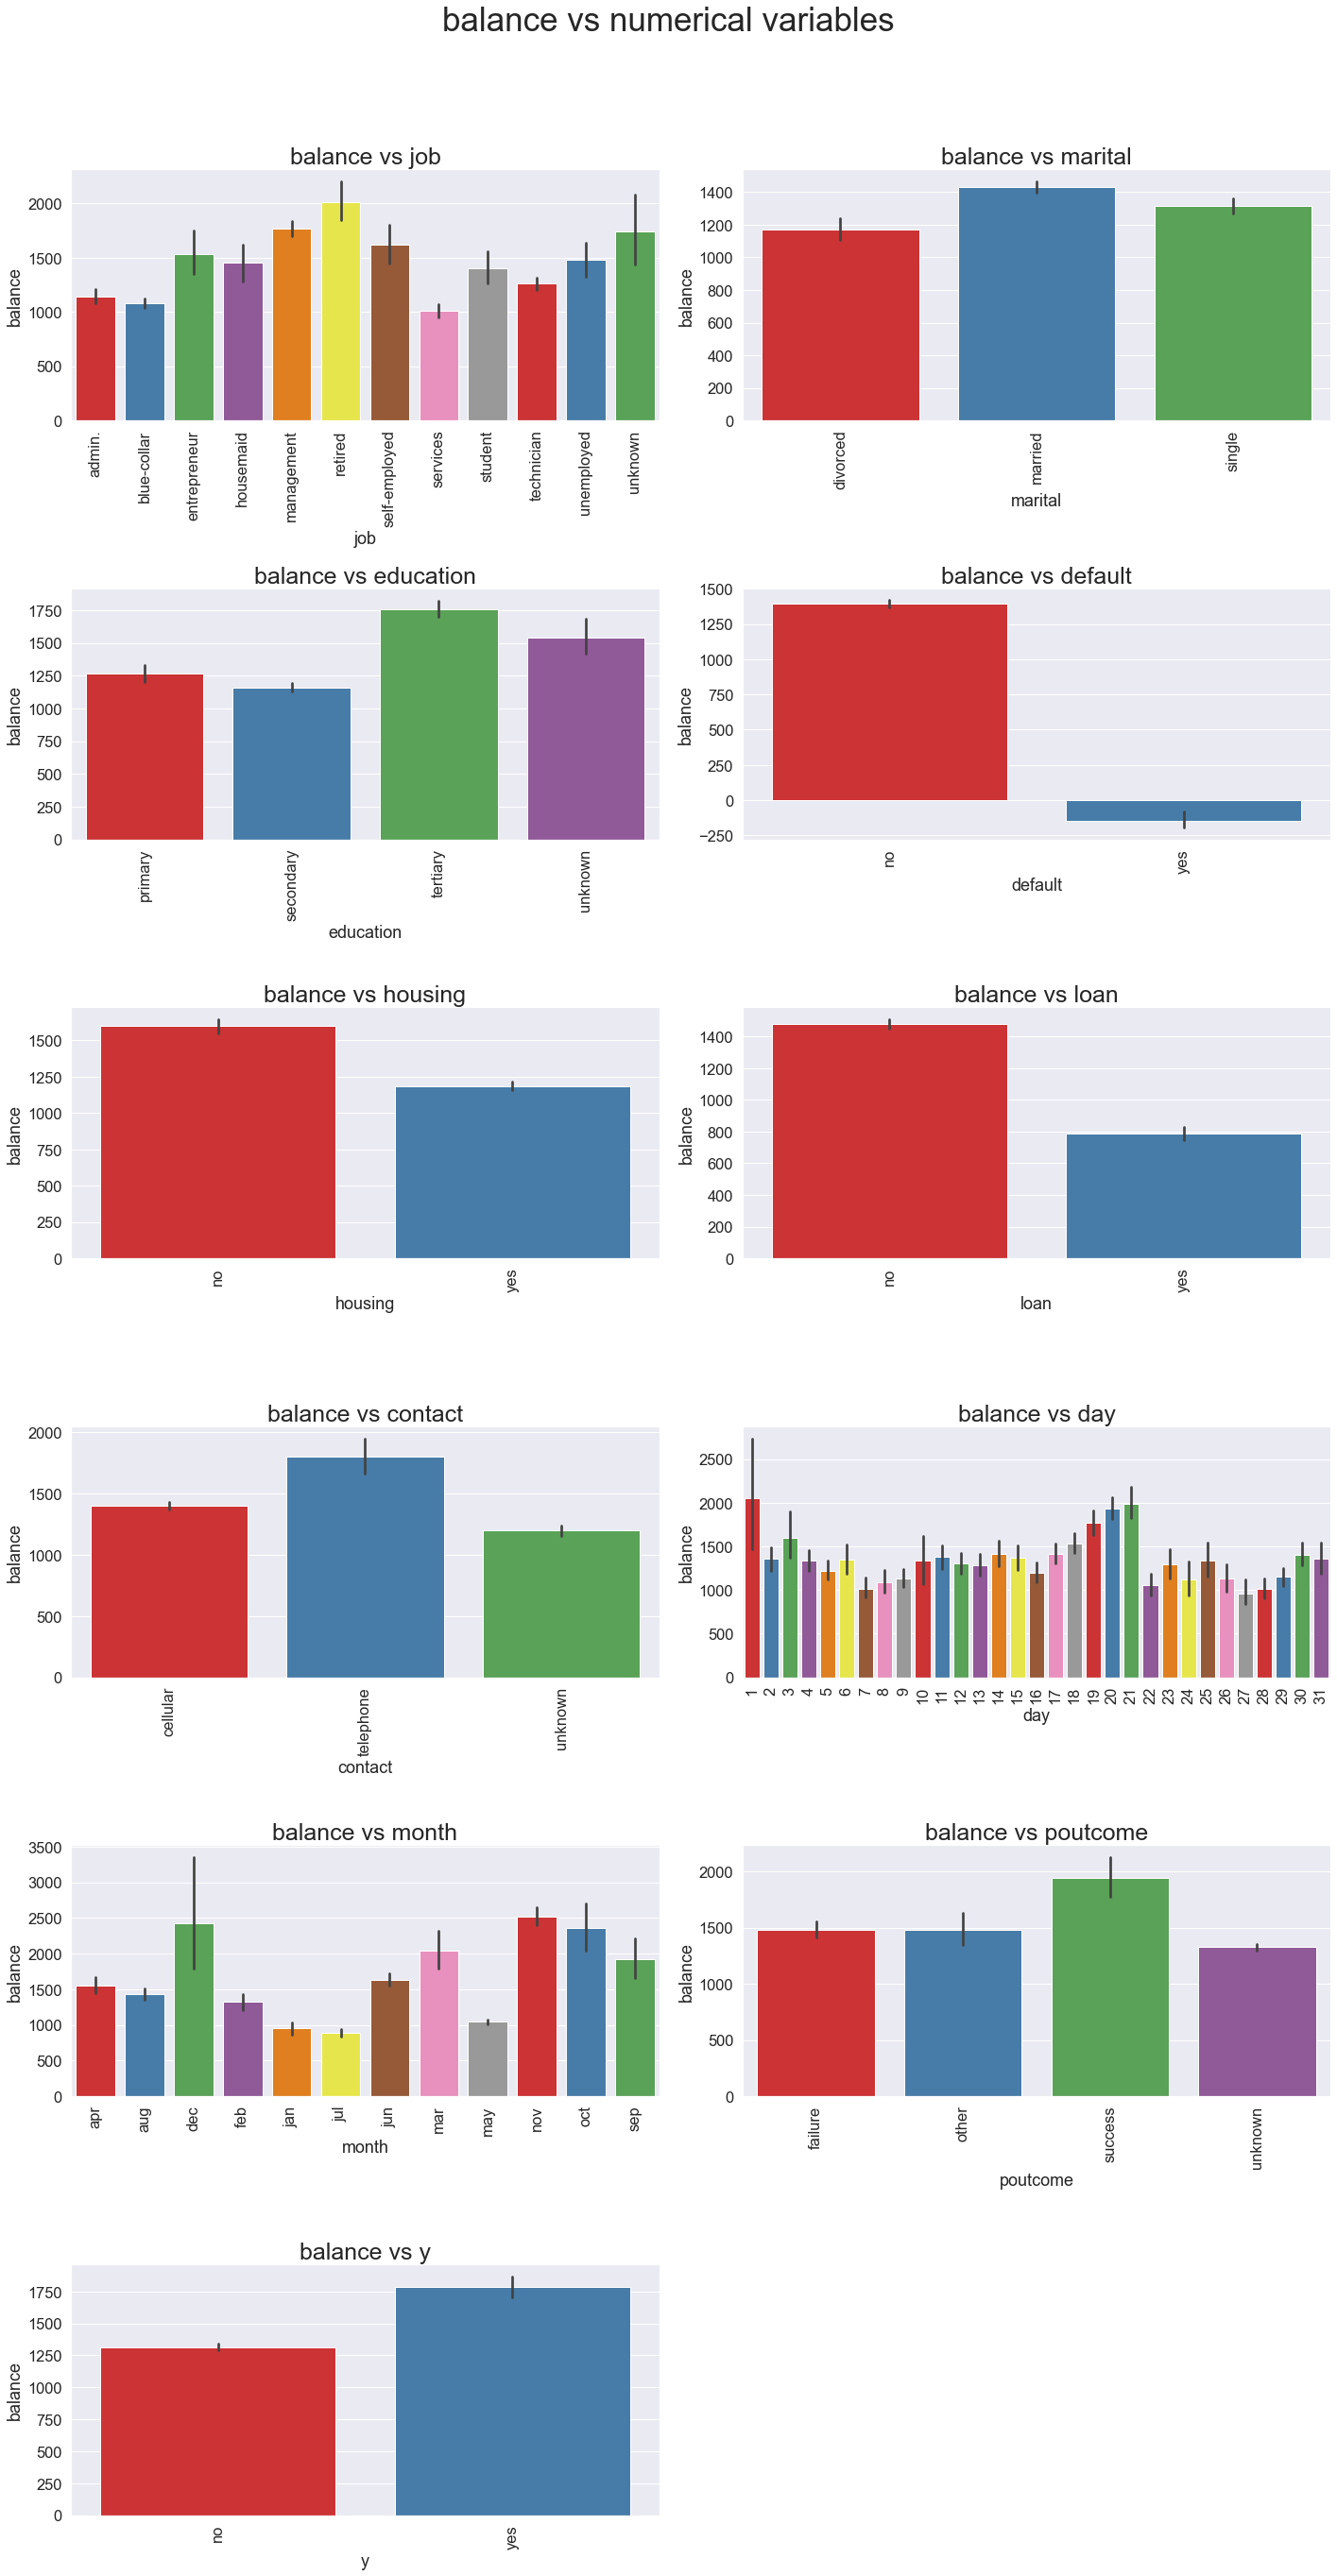

In [27]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank['balance'], palette='Set1')    
    ax.set_title('balance vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('balance vs numerical variables', y=1.03, fontsize=35)
plt.show()


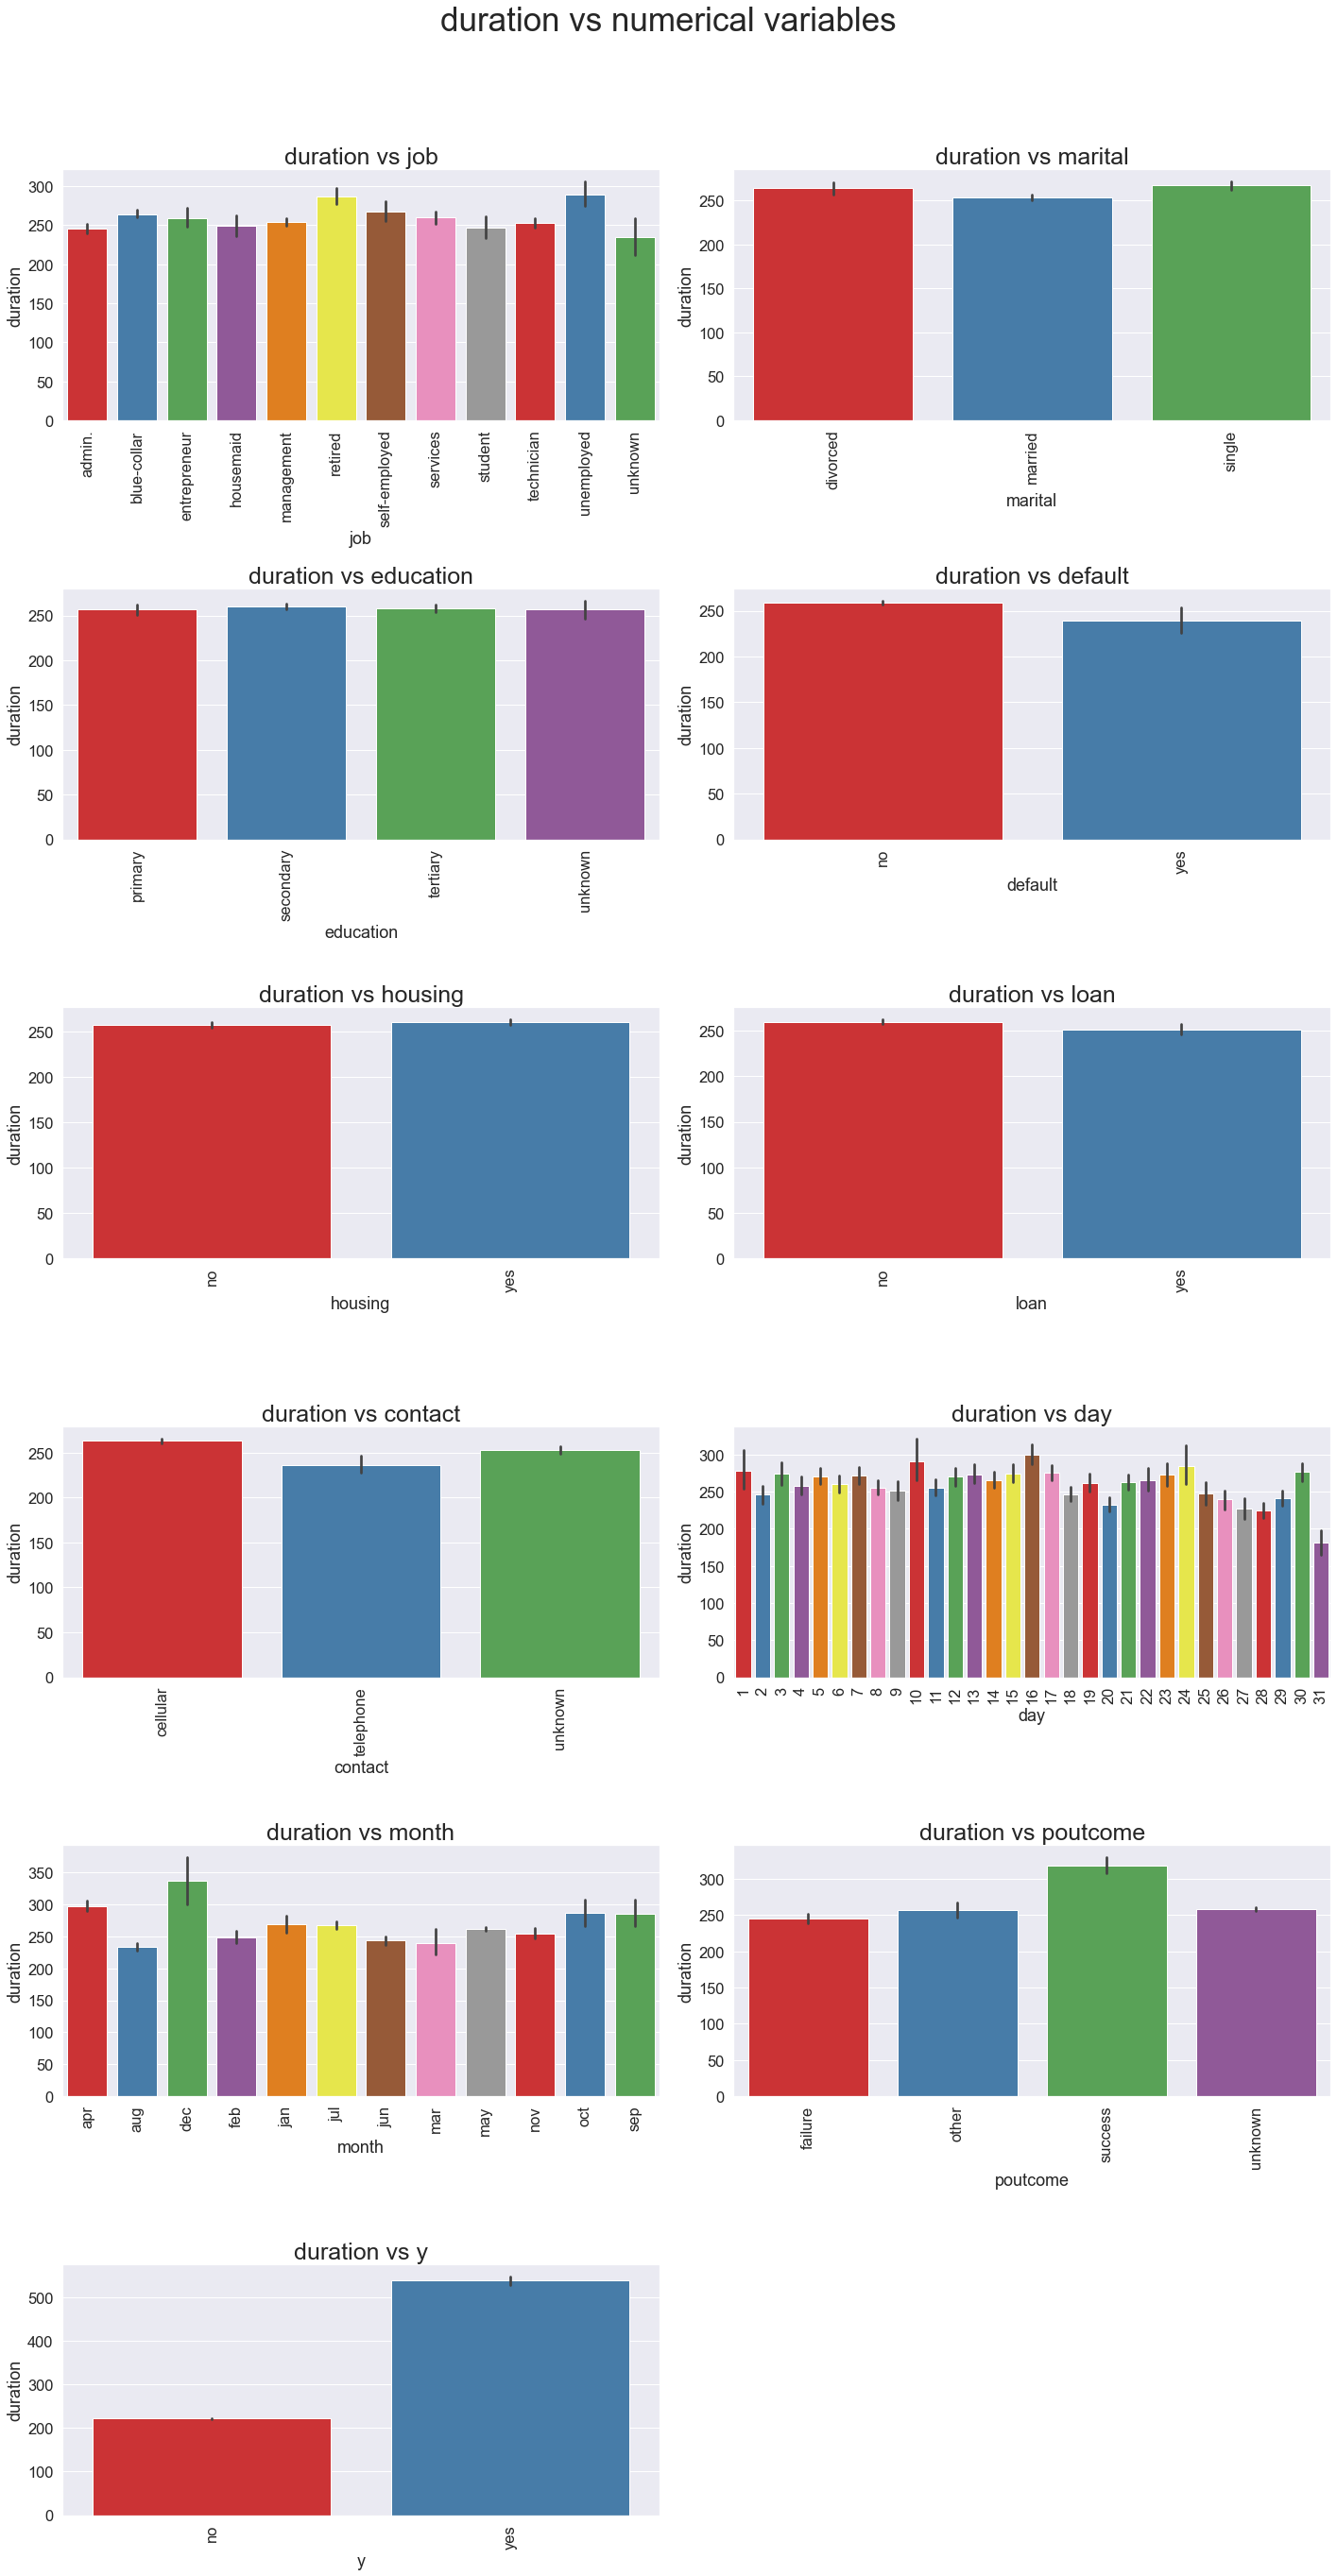

In [28]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank['duration'], palette='Set1')    
    ax.set_title('duration vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('duration vs numerical variables', y=1.03, fontsize=35)
plt.show()


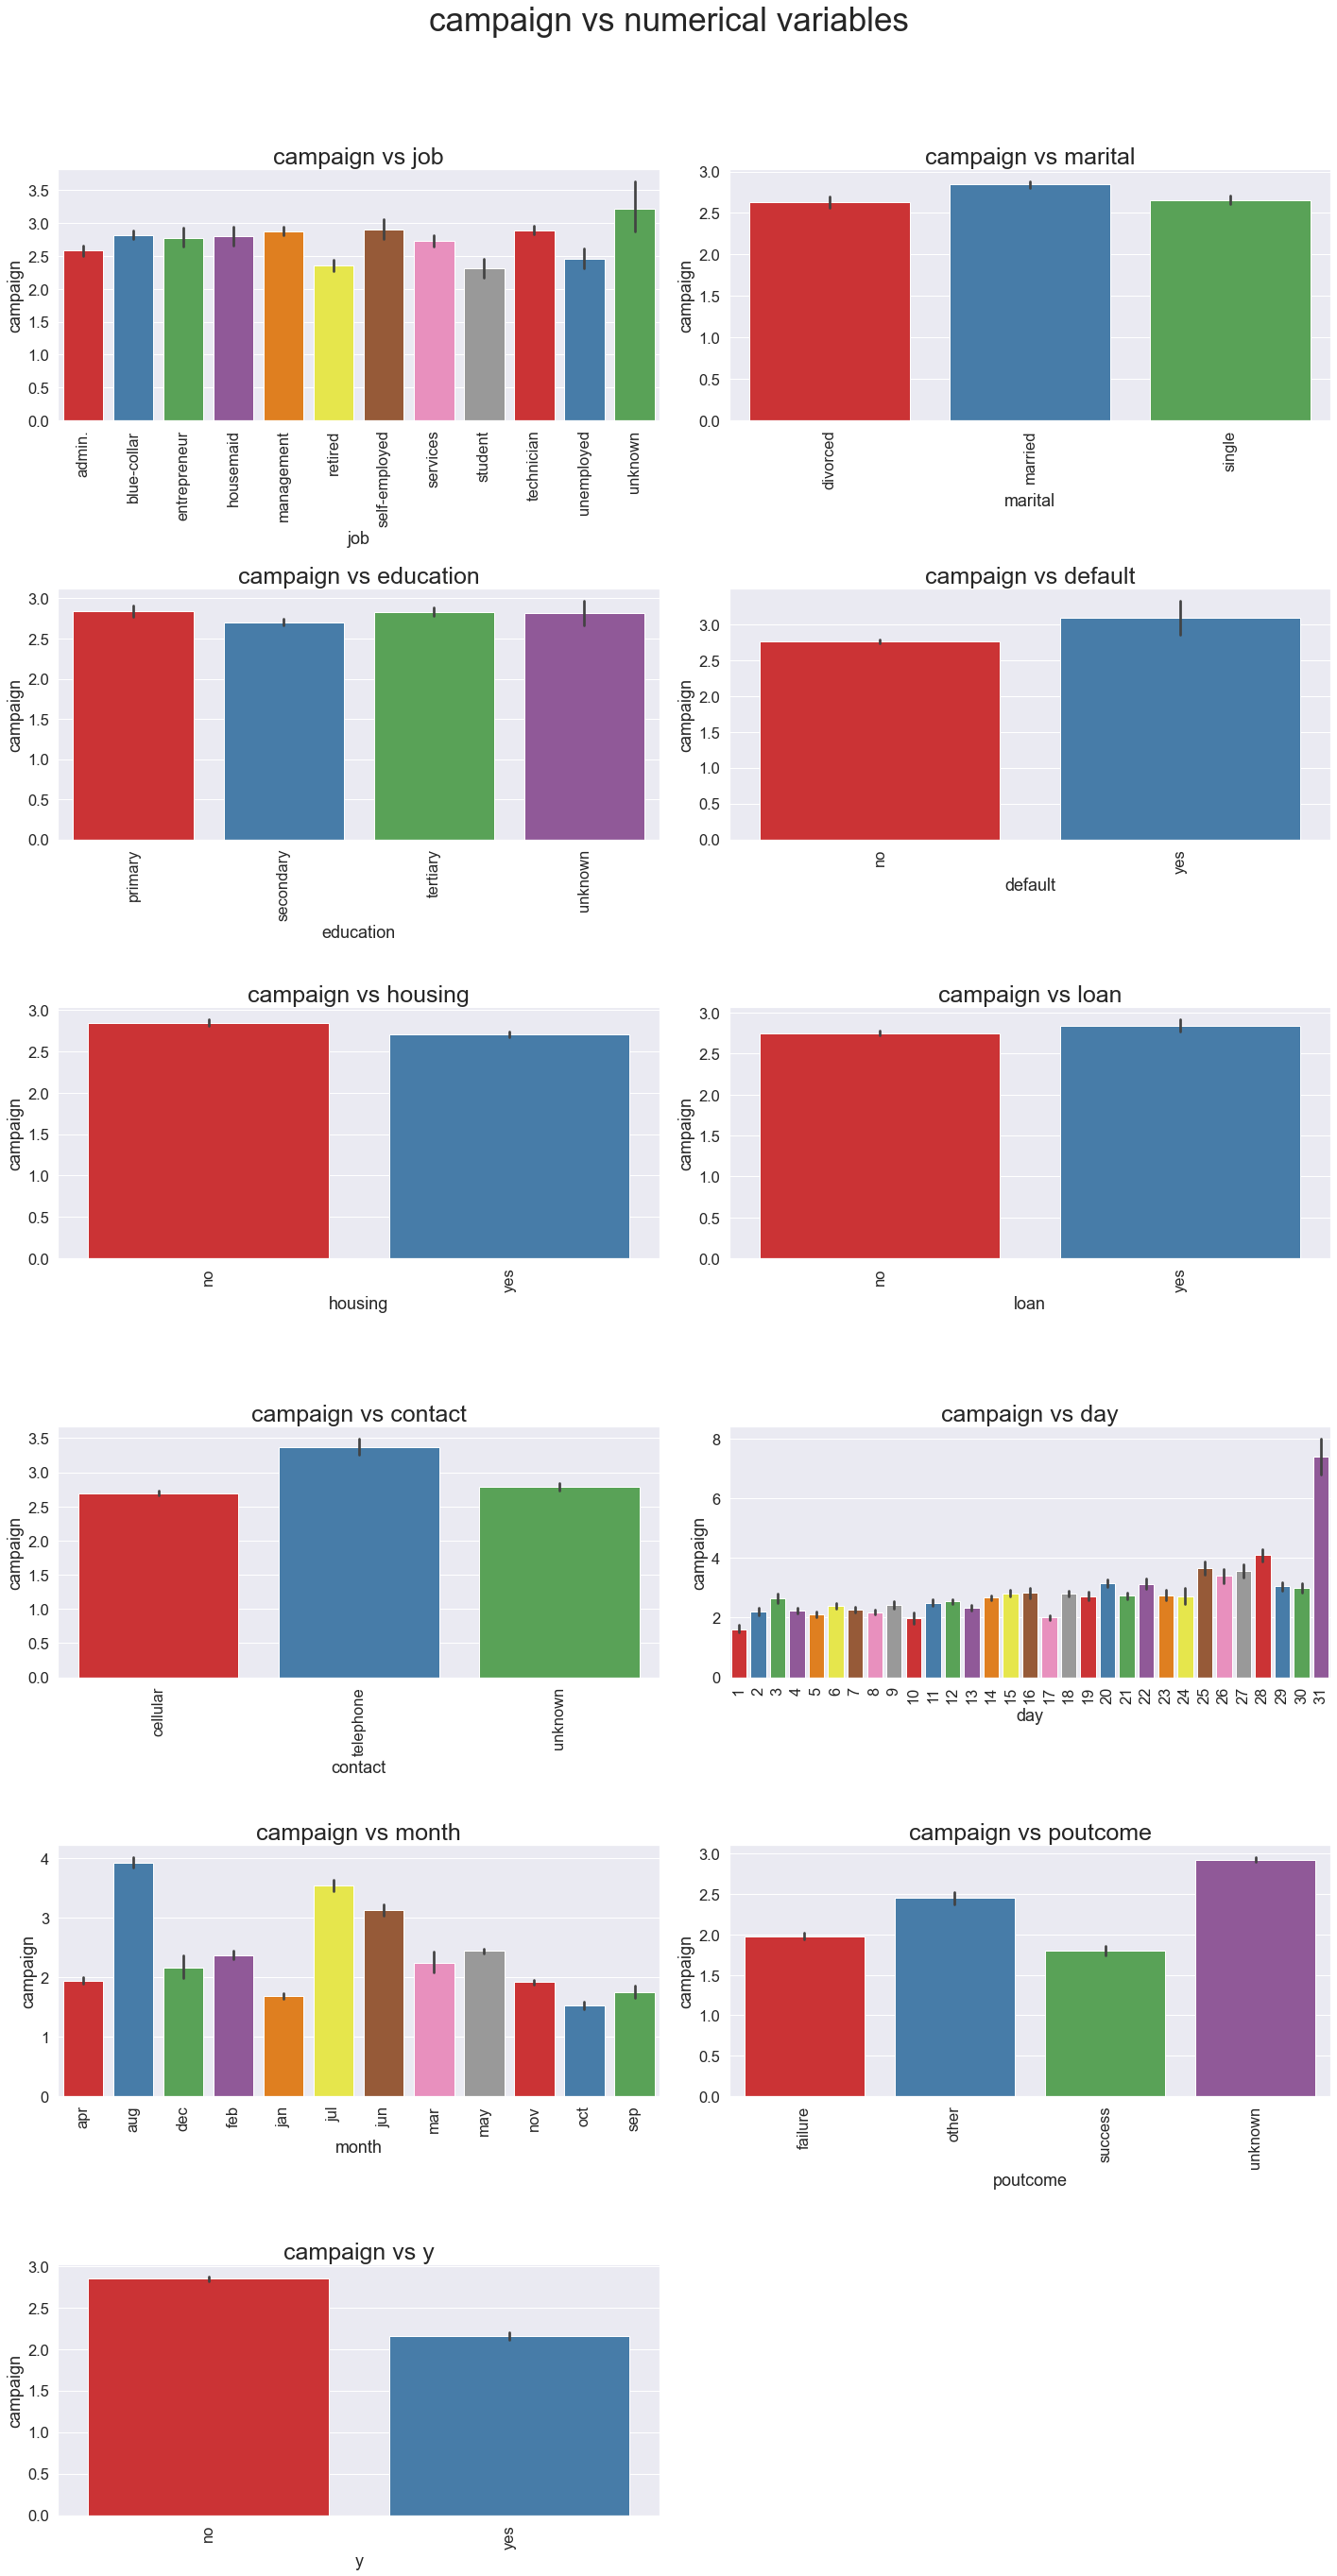

In [29]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank['campaign'], palette='Set1')    
    ax.set_title('campaign vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('campaign vs numerical variables', y=1.03, fontsize=35)
plt.show()


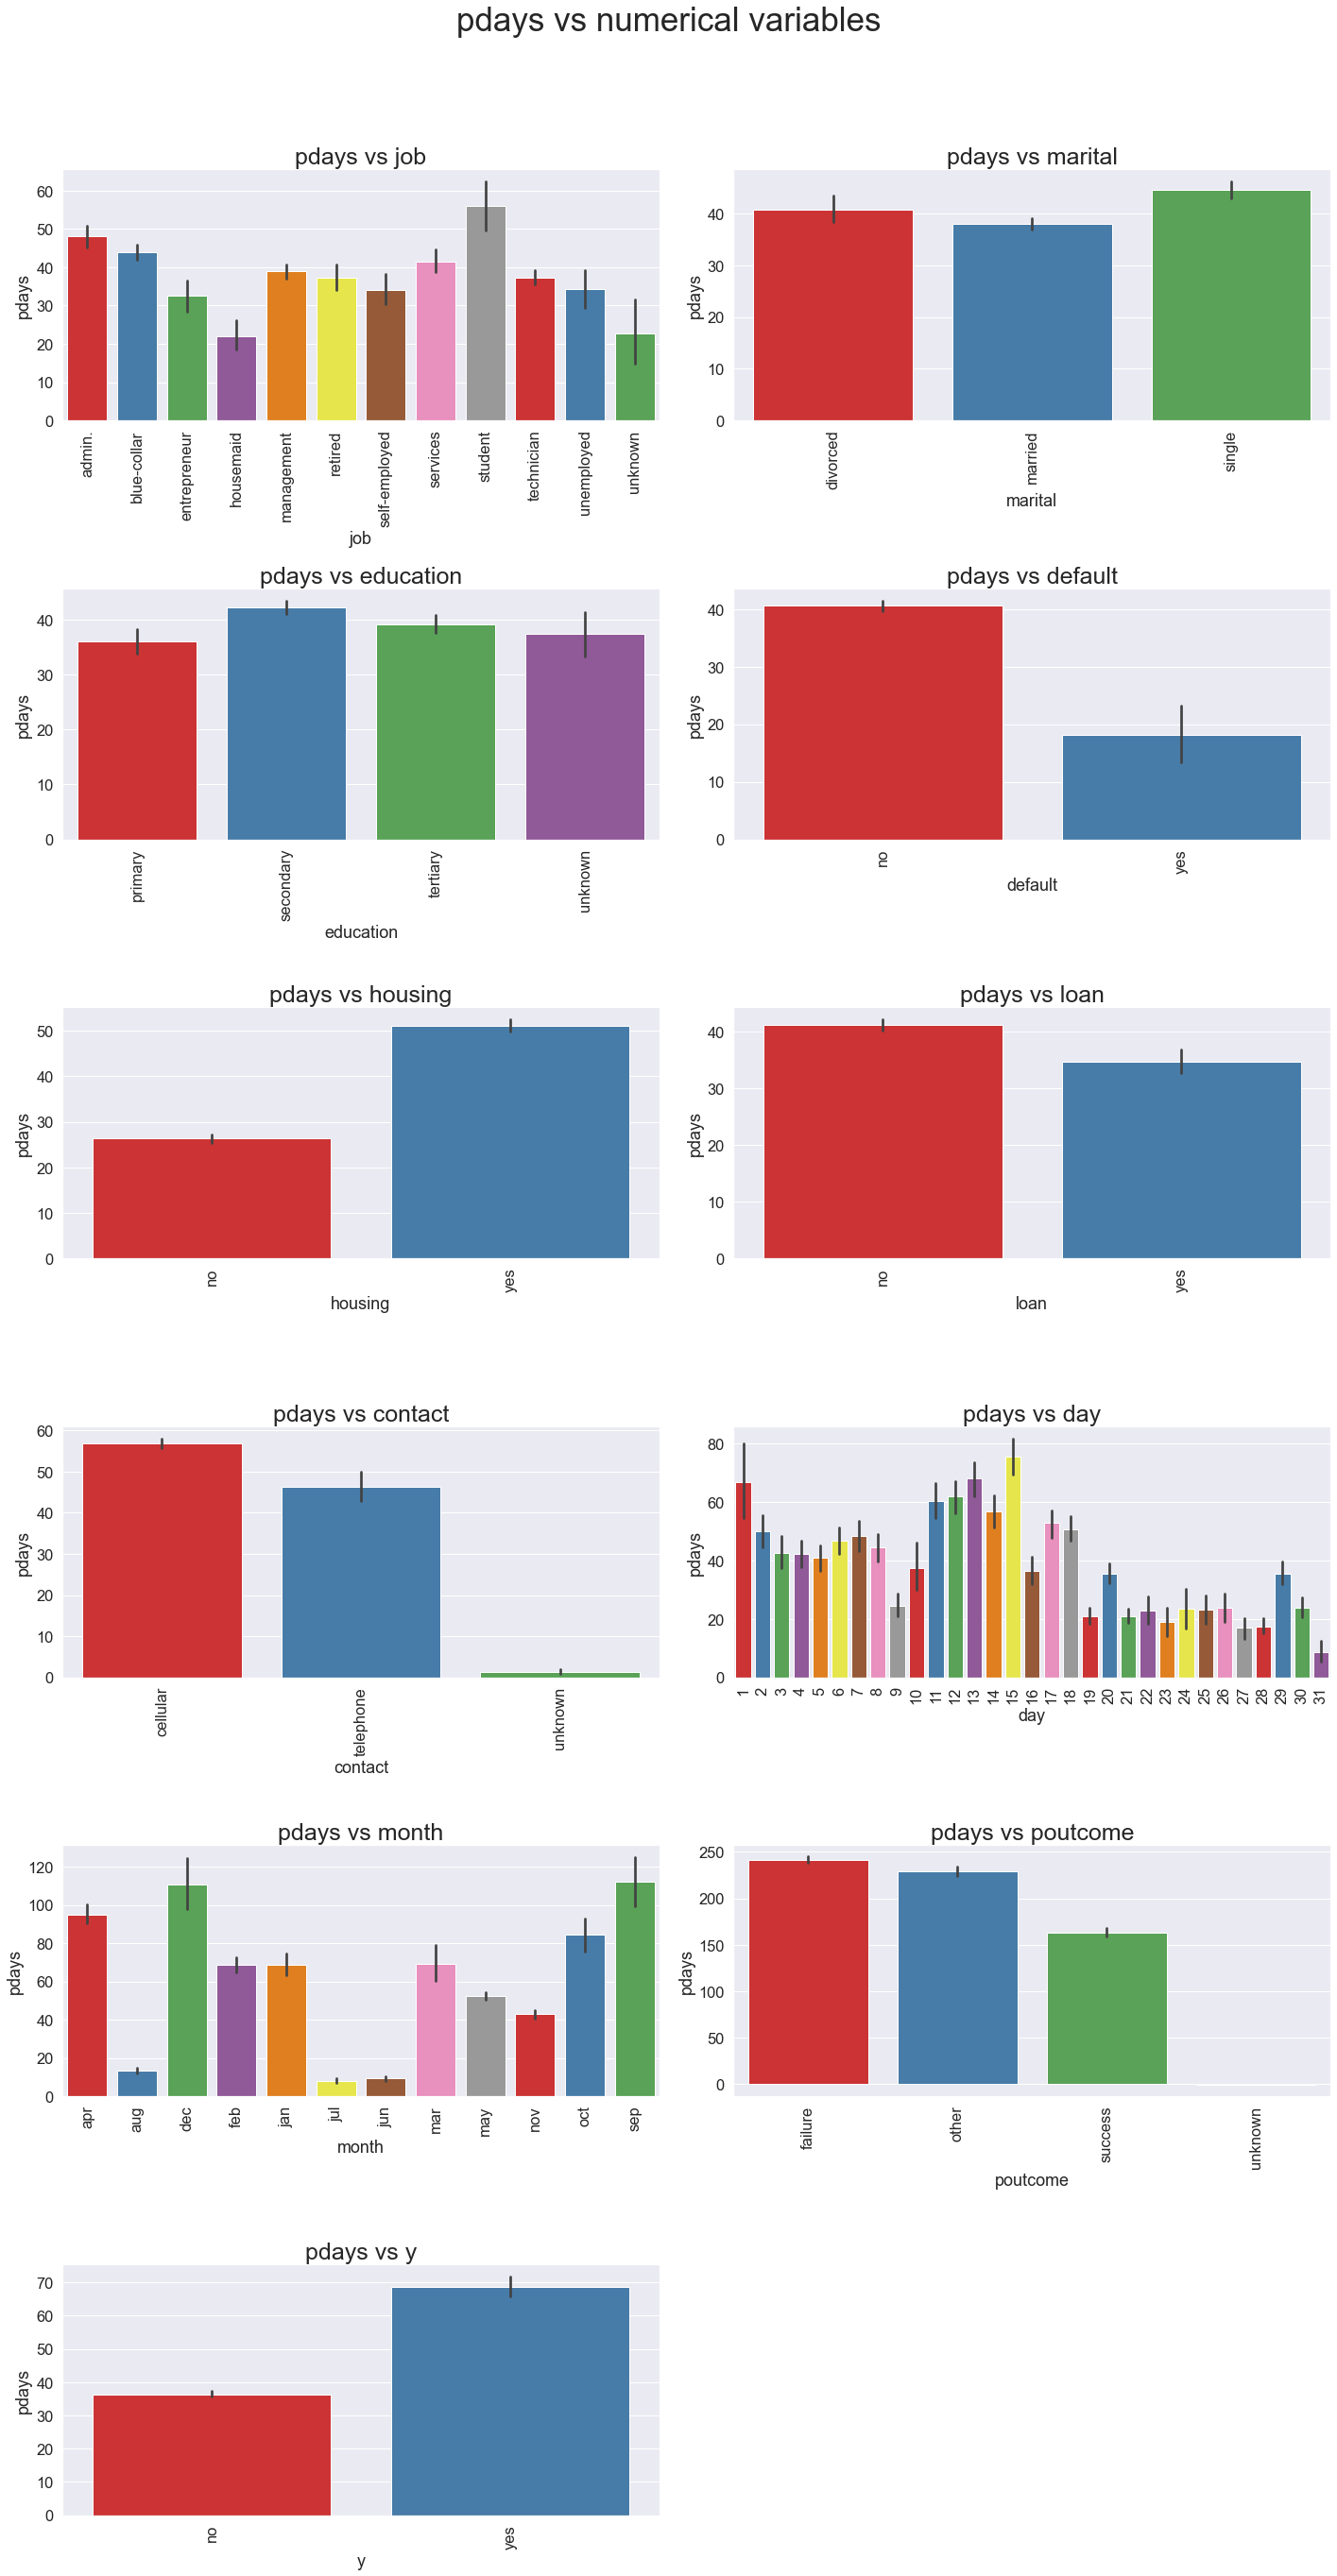

In [30]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank['pdays'], palette='Set1')    
    ax.set_title('pdays vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('pdays vs numerical variables', y=1.03, fontsize=35)
plt.show()


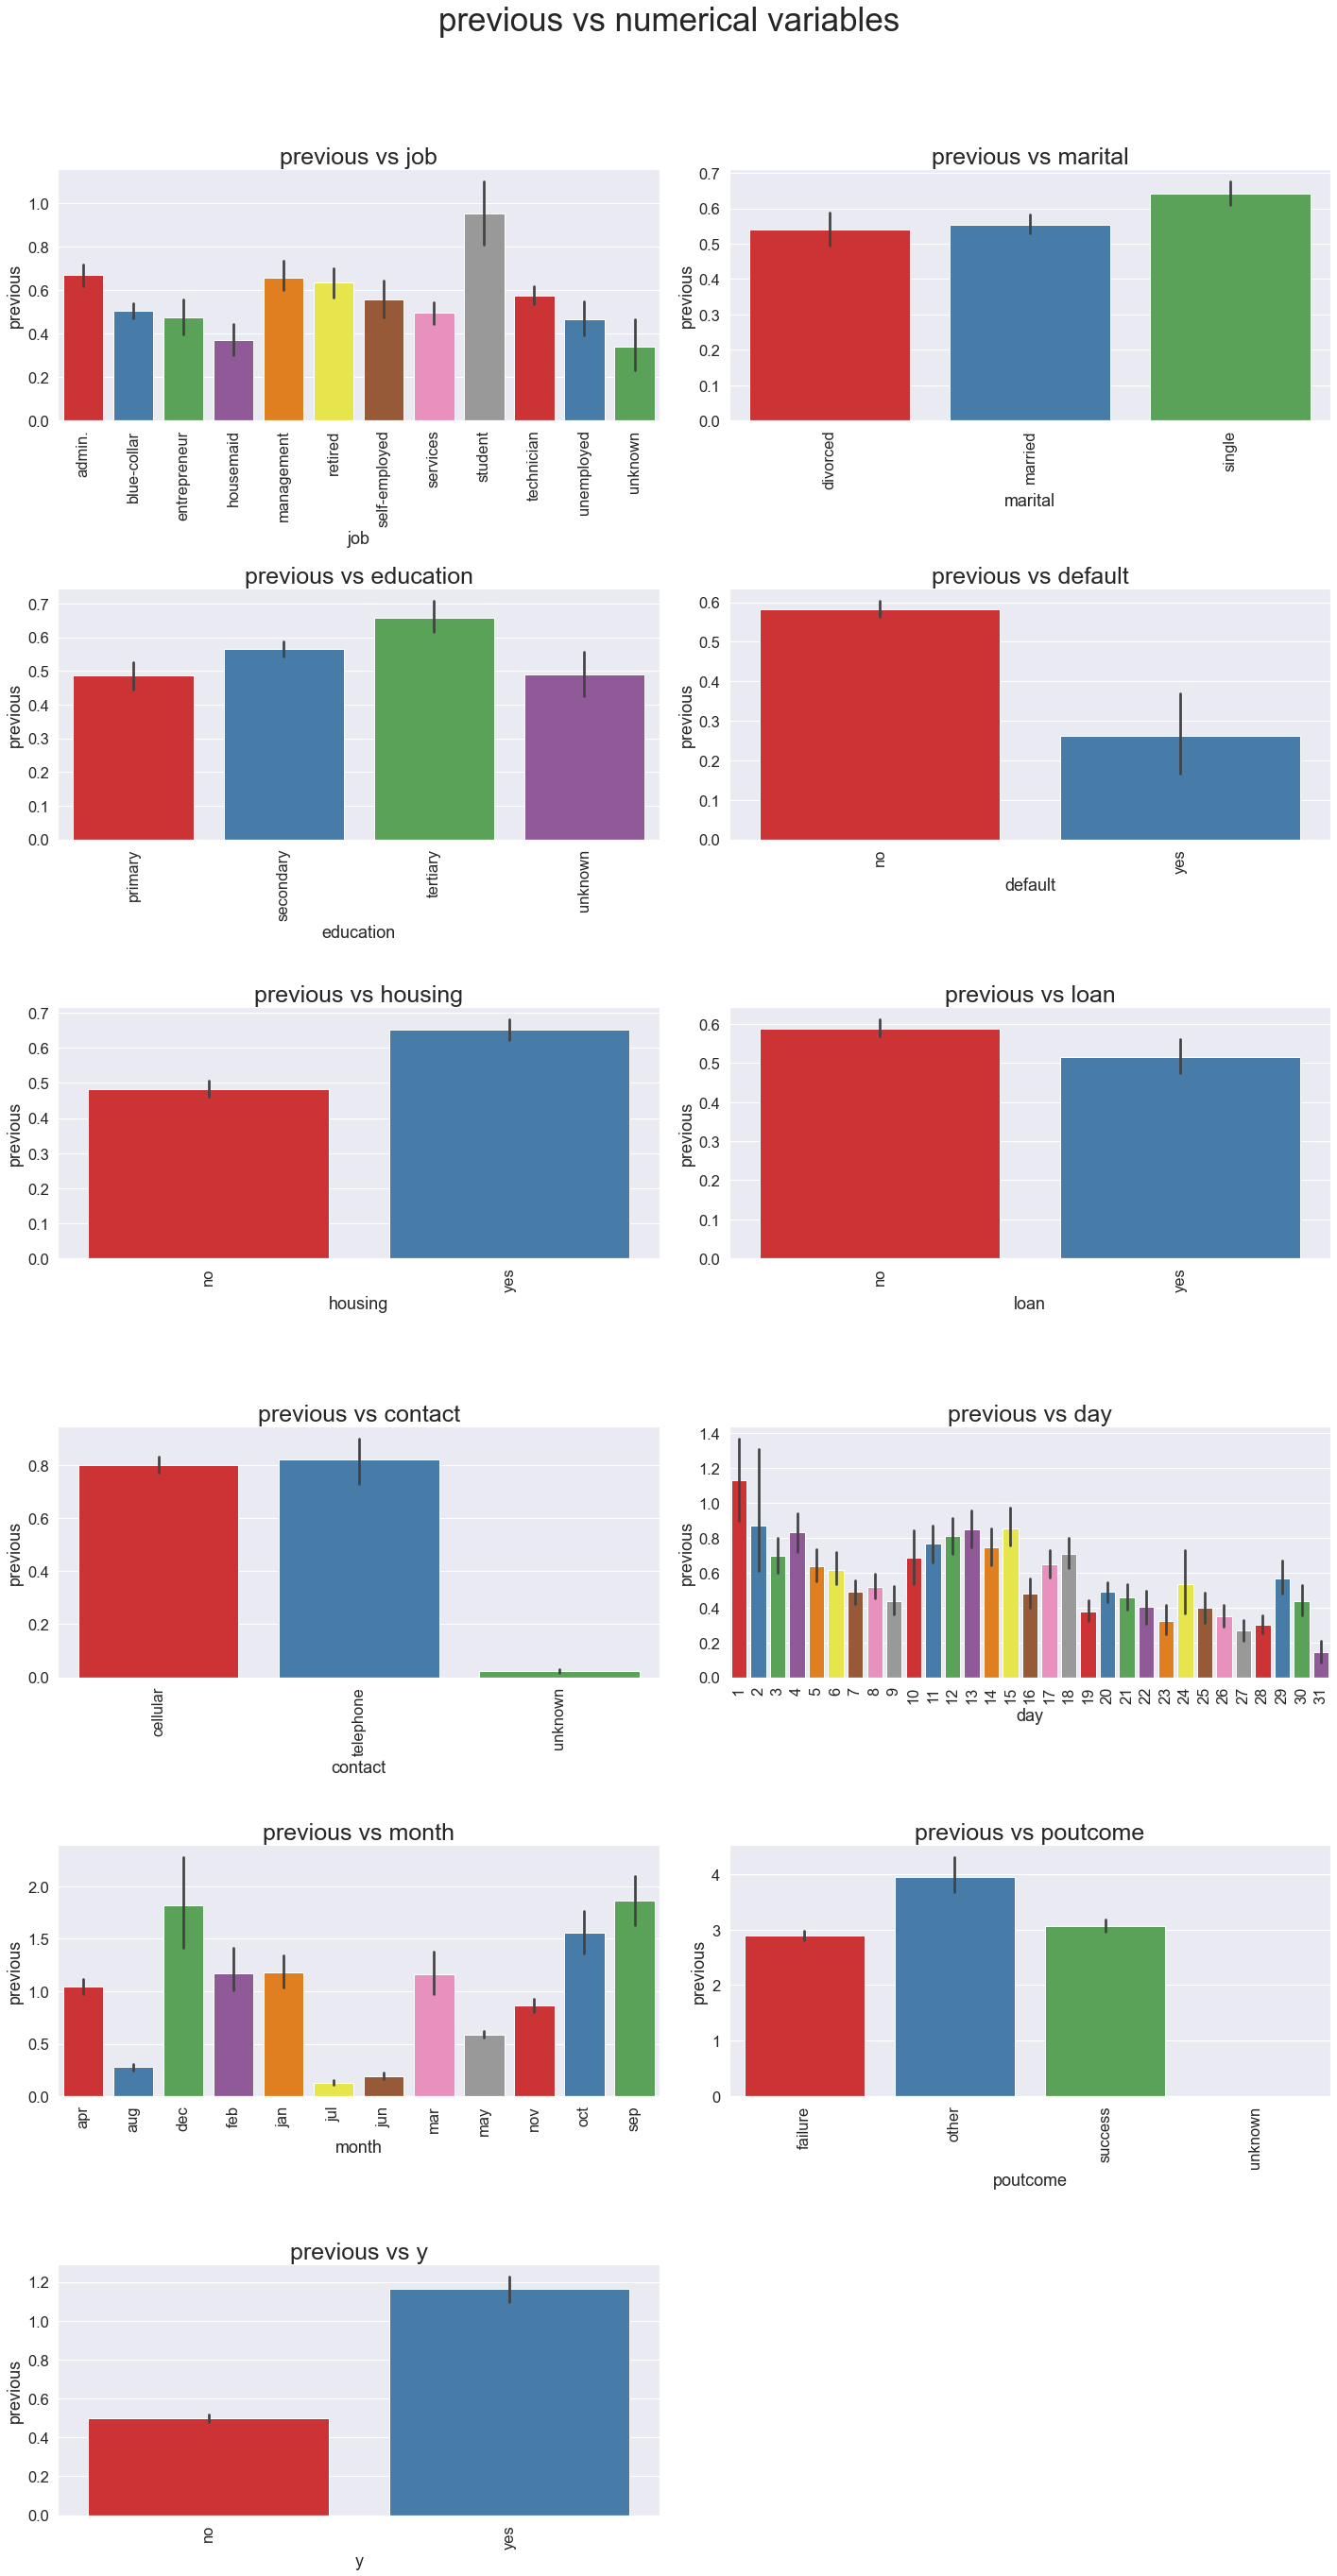

In [31]:
n=1
plt.subplots(figsize=(20, 60))
for i in category:
    plt.subplot(10,2,n)
    ax = plt.gca()
    sns.set(font_scale = 1.5)
    sns.barplot(x =bank1[i], y=bank['previous'], palette='Set1')    
    ax.set_title('previous vs %s'%(i), fontsize=25)
    plt.xticks(rotation=90)
    n+=1 
    
    plt.tight_layout()
plt.suptitle('previous vs numerical variables', y=1.03, fontsize=35)
plt.show()
